In [2]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt

In [3]:

data = pd.read_excel('/Users/saitejasriyerramsetti/Documents/Globalterror/Data/globalterrorismdb_0522dist.xlsx')

In [4]:
data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
data.columns.tolist()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [6]:
data.shape

(209706, 135)

In [7]:
data['country_txt'].value_counts()

country_txt
Iraq                 27521
Afghanistan          18920
Pakistan             15504
India                13929
Colombia              8915
                     ...  
Andorra                  1
International            1
Falkland Islands         1
North Korea              1
Wallis and Futuna        1
Name: count, Length: 204, dtype: int64

In [8]:
data1 = pd.read_excel('/Users/saitejasriyerramsetti/Documents/Globalterror/Data/globalterrorismdb_2021Jan-June_1222dist.xlsx')

In [9]:
combined_data = pd.concat([data, data1], ignore_index=True)
combined_data.shape

(214666, 135)

In [10]:
combined_data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Success Rate Analysis:

- Calculate overall success rate using the 'success' column.
- Group by 'attacktype1_txt' and calculate success rate for each attack type.
- Analyze success rates across different regions or countries.
- Investigate if certain weapons ('weaptype1_txt') are associated with higher success rates.

In [11]:
df = combined_data[['success', 'attacktype1_txt', 'region_txt', 'country_txt', 'weaptype1_txt', 'iyear', 'imonth', 'iday', 'gname', 'targtype1_txt', 'nperps', 
                    'multiple', 'suicide', 'property', 'nkill', 'nwound', 'vicinity', 
                    'crit1', 'crit2', 'crit3', 'extended']]

In [12]:
df.head(5)

,success,attacktype1_txt,region_txt,country_txt,weaptype1_txt,iyear,imonth,iday,gname,targtype1_txt,...,multiple,suicide,property,nkill,nwound,vicinity,crit1,crit2,crit3,extended
0,1,Assassination,Central America & Caribbean,Dominican Republic,Unknown,1970,7,2,MANO-D,Private Citizens & Property,...,0.0,0,0,1.0,0.0,0,1,1,1,0
1,1,Hostage Taking (Kidnapping),North America,Mexico,Unknown,1970,0,0,23rd of September Communist League,Government (Diplomatic),...,0.0,0,0,0.0,0.0,0,1,1,1,0
2,1,Assassination,Southeast Asia,Philippines,Unknown,1970,1,0,Unknown,Journalists & Media,...,0.0,0,0,1.0,0.0,0,1,1,1,0
3,1,Bombing/Explosion,Western Europe,Greece,Explosives,1970,1,0,Unknown,Government (Diplomatic),...,0.0,0,1,NaN,NaN,0,1,1,1,0
4,1,Facility/Infrastructure Attack,East Asia,Japan,Incendiary,1970,1,0,Unknown,Government (Diplomatic),...,0.0,0,1,NaN,NaN,0,1,1,1,0


In [13]:
df.shape

(214666, 21)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214666 entries, 0 to 214665
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   success          214666 non-null  int64  
 1   attacktype1_txt  214666 non-null  object 
 2   region_txt       214666 non-null  object 
 3   country_txt      214666 non-null  object 
 4   weaptype1_txt    214666 non-null  object 
 5   iyear            214666 non-null  int64  
 6   imonth           214666 non-null  int64  
 7   iday             214666 non-null  int64  
 8   gname            214666 non-null  object 
 9   targtype1_txt    214666 non-null  object 
 10  nperps           143573 non-null  float64
 11  multiple         214663 non-null  float64
 12  suicide          214666 non-null  int64  
 13  property         214666 non-null  int64  
 14  nkill            201715 non-null  float64
 15  nwound           193961 non-null  float64
 16  vicinity         214666 non-null  int6

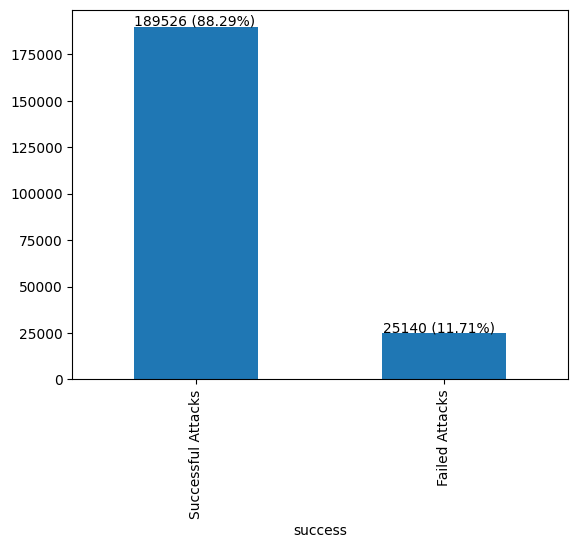

In [15]:
total = df['success'].count()
ax = df['success'].replace({1: 'Successful Attacks', 0: 'Failed Attacks'}).value_counts().plot(kind='bar')
for p in ax.patches:
    percentage = f'{(p.get_height() / total) * 100:.2f}%'
    ax.annotate(f'{p.get_height()} ({percentage})', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [16]:
df['attacktype1_txt'].value_counts()

attacktype1_txt
Bombing/Explosion                      99986
Armed Assault                          50845
Assassination                          21989
Hostage Taking (Kidnapping)            14493
Facility/Infrastructure Attack         12606
Unknown                                11545
Unarmed Assault                         1257
Hostage Taking (Barricade Incident)     1172
Hijacking                                773
Name: count, dtype: int64

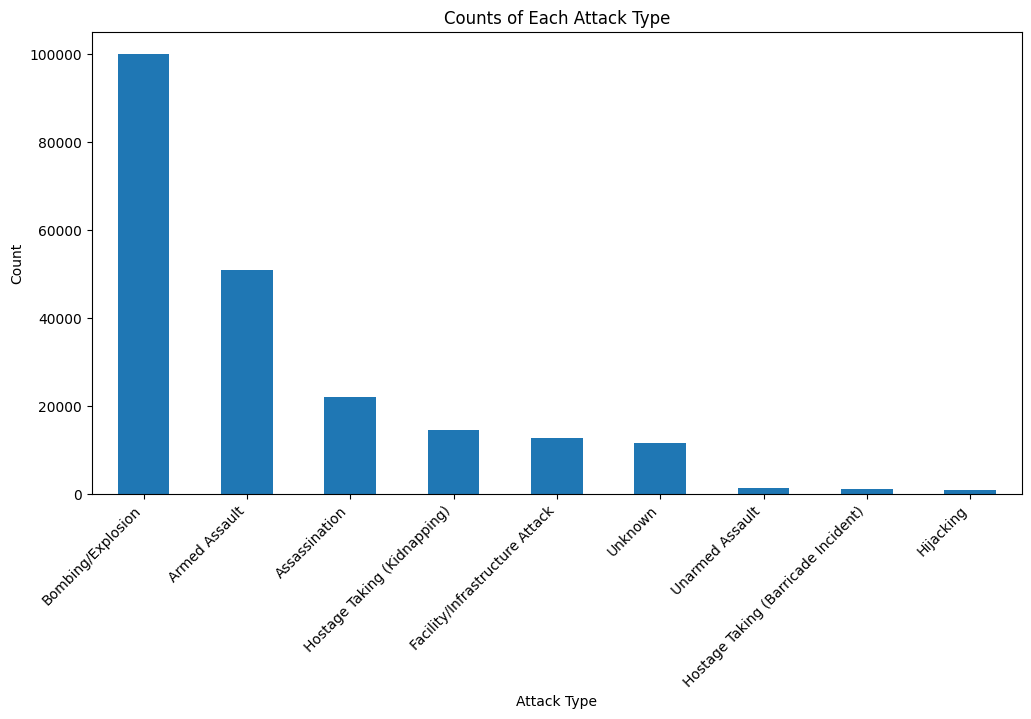

In [17]:
attack_counts = df['attacktype1_txt'].value_counts()
ax = attack_counts.plot(kind='bar', figsize=(12, 6), title='Counts of Each Attack Type')
ax.set_xlabel('Attack Type')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

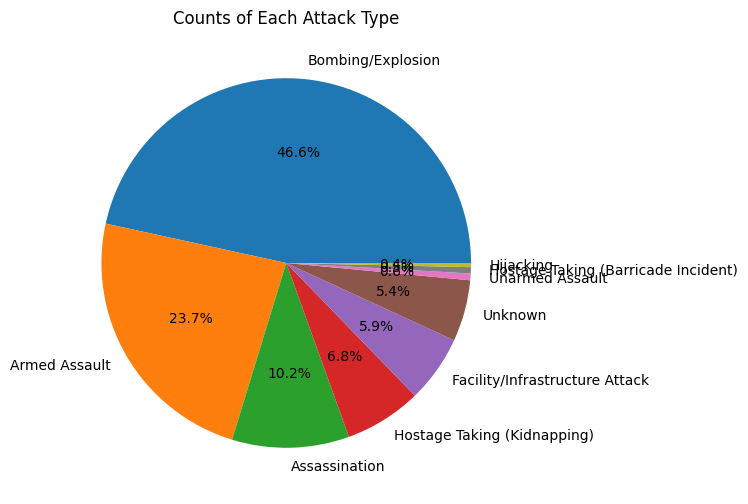

In [18]:
attack_counts = df['attacktype1_txt'].value_counts()
ax = attack_counts.plot(kind='pie', figsize=(12, 6), autopct='%1.1f%%', title='Counts of Each Attack Type')
ax.set_ylabel('')  # Remove the default y-label
plt.show()

In [19]:
df.to_csv('success_failure_data.csv', index=False)

In [20]:
combined_data[combined_data['gname']== 'Unknown']['gname'].count()

np.int64(93675)

In [21]:
# Finding columns with 'Unknown' values
unknown_cols = combined_data.isin(['Unknown']).any()
unknown_columns = combined_data.columns[unknown_cols].tolist()
print(unknown_columns)


['provstate', 'city', 'location', 'attacktype1_txt', 'attacktype2_txt', 'targtype1_txt', 'corp1', 'target1', 'targtype2_txt', 'corp2', 'target2', 'corp3', 'target3', 'gname', 'motive', 'claimmode_txt', 'claimmode2_txt', 'claimmode3_txt', 'weaptype1_txt', 'weaptype2_txt', 'weaptype3_txt', 'propextent_txt', 'propcomment', 'divert', 'kidhijcountry', 'ransomnote', 'hostkidoutcome_txt']


In [22]:
for i in unknown_columns:
    print(f'{i}: {combined_data[i].isin(["Unknown"]).sum()}')

provstate: 4491
city: 11334
location: 16
attacktype1_txt: 11545
attacktype2_txt: 3
targtype1_txt: 7351
corp1: 21110
target1: 7373
targtype2_txt: 77
corp2: 1320
target2: 84
corp3: 151
target3: 12
gname: 93675
motive: 14877
claimmode_txt: 4945
claimmode2_txt: 259
claimmode3_txt: 32
weaptype1_txt: 20978
weaptype2_txt: 1322
weaptype3_txt: 80
propextent_txt: 22721
propcomment: 1
divert: 27
kidhijcountry: 88
ransomnote: 4
hostkidoutcome_txt: 5030


region_txt
Australasia & Oceania            198
Central America & Caribbean     3718
Central Asia                     454
East Asia                        514
Eastern Europe                  3541
Middle East & North Africa     32338
North America                   1075
South America                   5586
South Asia                     25815
Southeast Asia                  7032
Sub-Saharan Africa              8045
Western Europe                  5359
dtype: int64


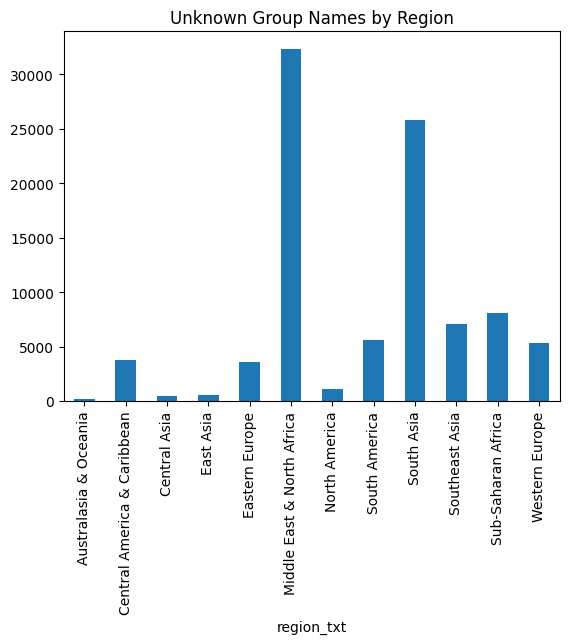

In [23]:
# Investigating unknown group names by region
unknown_groups_by_region = df[df['gname'] == 'Unknown'].groupby('region_txt').size()
print(unknown_groups_by_region)

# Visualizing the distribution
unknown_groups_by_region.plot(kind='bar', title='Unknown Group Names by Region')
plt.show()


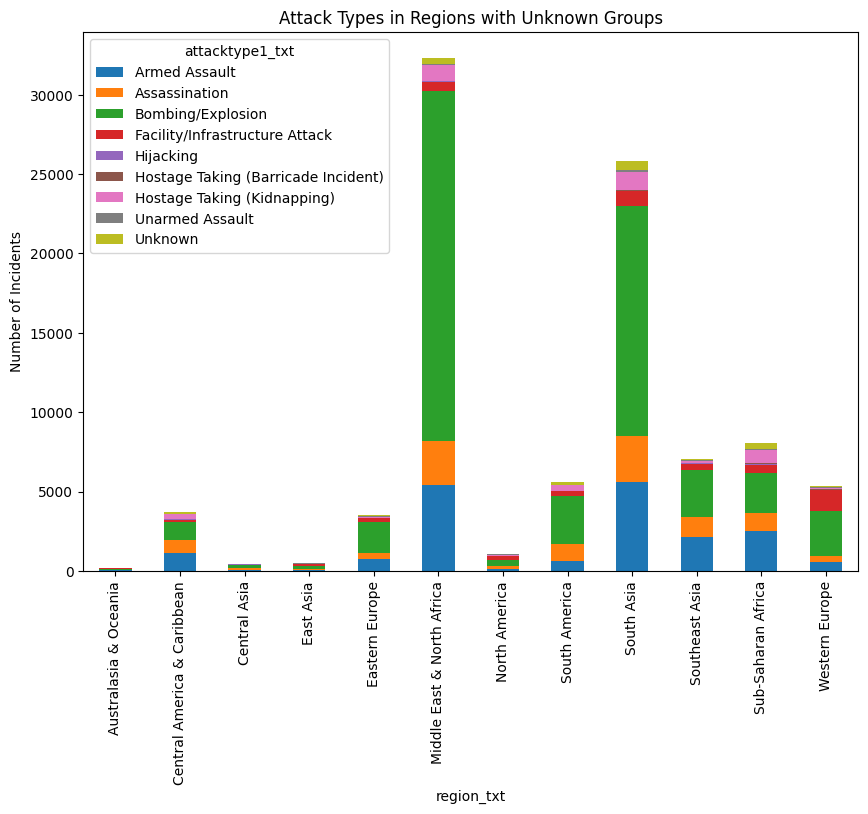

In [24]:
# Filter for rows where group name is unknown
unknown_gname_df = df[df['gname'] == 'Unknown']

# Group by region and attack type to count occurrences
attacktype_by_region = unknown_gname_df.groupby(['region_txt', 'attacktype1_txt']).size().unstack()

# Plot the results to visualize attack types in regions with unknown groups
attacktype_by_region.plot(kind='bar', stacked=True, figsize=(10, 7), title='Attack Types in Regions with Unknown Groups')
plt.ylabel('Number of Incidents')
plt.show()


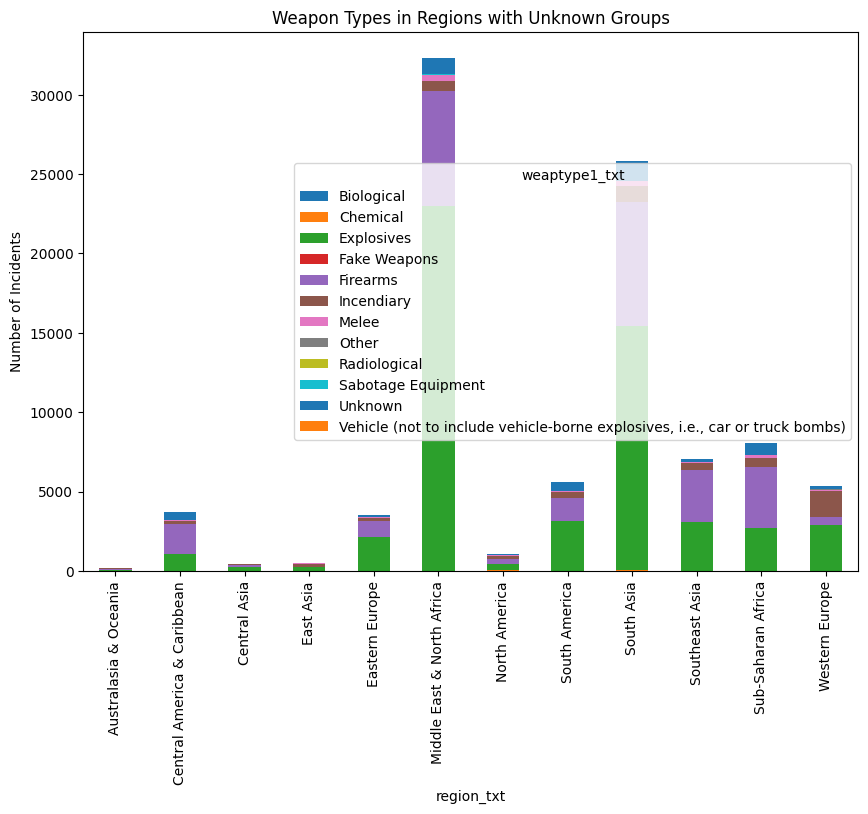

In [25]:
# Group by region and weapon type
weapontype_by_region = unknown_gname_df.groupby(['region_txt', 'weaptype1_txt']).size().unstack()

# Plot the results to visualize weapon types in regions with unknown groups
weapontype_by_region.plot(kind='bar', stacked=True, figsize=(10, 7), title='Weapon Types in Regions with Unknown Groups')
plt.ylabel('Number of Incidents')
plt.show()


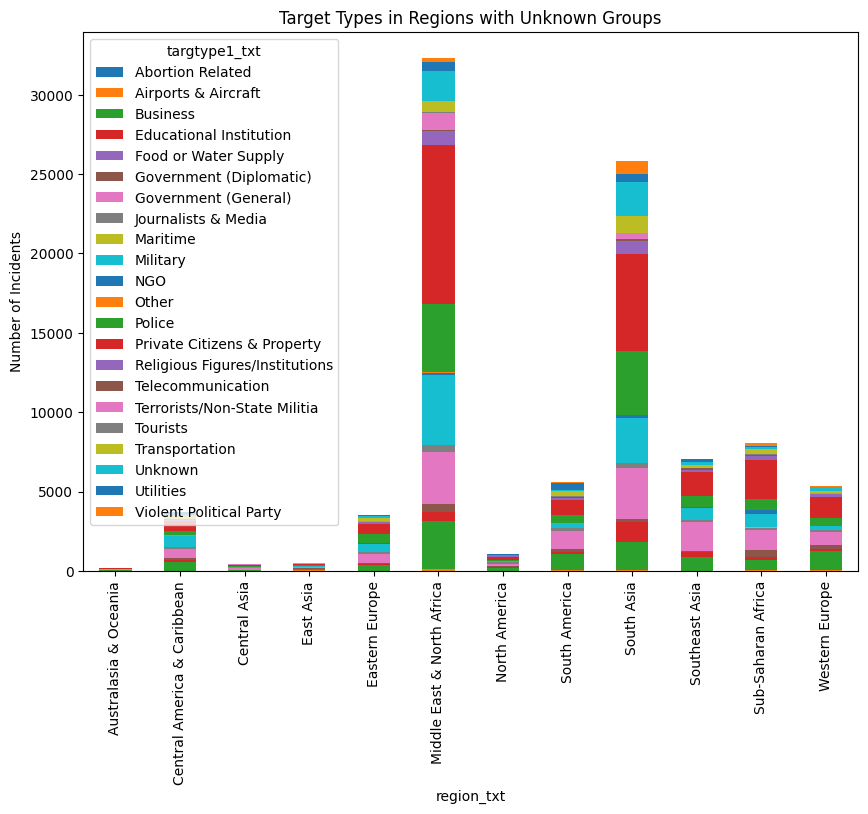

In [26]:
# Example: Investigate target types for unknown groups
targettype_by_region = unknown_gname_df.groupby(['region_txt', 'targtype1_txt']).size().unstack()

# Plotting target types by region with unknown groups
targettype_by_region.plot(kind='bar', stacked=True, figsize=(10, 7), title='Target Types in Regions with Unknown Groups')
plt.ylabel('Number of Incidents')
plt.show()


In [27]:
df = pd.read_csv('/Users/saitejasriyerramsetti/Documents/Globalterror/Data/success_failure_data.csv')

In [28]:
df.isnull().sum()

success                0
attacktype1_txt        0
region_txt             0
country_txt            0
weaptype1_txt          0
iyear                  0
imonth                 0
iday                   0
gname                  0
targtype1_txt          0
nperps             71093
multiple               3
suicide                0
property               0
nkill              12951
nwound             20705
vicinity               0
crit1                  0
crit2                  0
crit3                  0
extended               0
dtype: int64

In [29]:
df['nperps'].unique()

array([      nan,  7.00e+00, -9.90e+01,  3.00e+00,  1.00e+00,  5.00e+00,
        2.00e+00,  4.00e+00,  6.00e+00,  4.20e+01,  2.20e+01,  9.00e+00,
        2.50e+01,  1.60e+01,  1.10e+01,  1.20e+01,  8.00e+00,  0.00e+00,
        1.50e+01,  1.00e+01,  1.80e+01,  1.70e+01,  2.00e+02,  3.00e+01,
        6.00e+01,  2.00e+01,  5.00e+01,  1.30e+01,  2.40e+01,  7.00e+01,
        4.00e+01,  1.00e+02,  1.40e+01,  1.40e+02,  8.00e+01,  3.20e+01,
        4.00e+02,  1.00e+03,  2.50e+02,  3.50e+01,  1.50e+02,  3.00e+02,
        7.50e+01,  5.00e+02,  6.00e+02,  4.40e+01,  4.50e+01,  3.80e+01,
        9.00e+01,  1.20e+02,  3.40e+01,  2.70e+01,  1.80e+02,  9.00e+02,
        1.20e+03,  3.70e+02,  1.30e+02,  7.50e+02,  4.80e+01,  7.00e+02,
        7.20e+01,  3.30e+01,  3.90e+01,  4.90e+01,  2.60e+01,  1.90e+01,
        2.90e+02,  6.80e+01,  1.60e+02,  2.04e+02,  2.80e+01,  3.60e+01,
        2.10e+01,  2.50e+04,  2.90e+01,  1.50e+03,  2.50e+03,  1.90e+02,
        4.70e+01,  1.00e+04,  1.38e+02,  2.00e+04, 

In [30]:
columns_to_check = df.columns.tolist()

In [31]:
for column in columns_to_check:
    df[column] = df[column].fillna("Unknown")

# Verify the changes
print(df[columns_to_check].isnull().sum())

success            0
attacktype1_txt    0
region_txt         0
country_txt        0
weaptype1_txt      0
iyear              0
imonth             0
iday               0
gname              0
targtype1_txt      0
nperps             0
multiple           0
suicide            0
property           0
nkill              0
nwound             0
vicinity           0
crit1              0
crit2              0
crit3              0
extended           0
dtype: int64


In [32]:
df.columns

Index(['success', 'attacktype1_txt', 'region_txt', 'country_txt',
       'weaptype1_txt', 'iyear', 'imonth', 'iday', 'gname', 'targtype1_txt',
       'nperps', 'multiple', 'suicide', 'property', 'nkill', 'nwound',
       'vicinity', 'crit1', 'crit2', 'crit3', 'extended'],
      dtype='object')

In [33]:
df['success'].unique

<bound method Series.unique of 0         1
1         1
2         1
3         1
4         1
         ..
214661    1
214662    1
214663    1
214664    0
214665    1
Name: success, Length: 214666, dtype: int64>

In [34]:
success_failure = pd.get_dummies(df,columns=['success'])